In [ ]:
%%capture
!pip install pybamm

In [ ]:
%%capture
!pip install import-ipynb

In [ ]:
import os
current_dir = os.getcwd()
new_dir = '/content/drive/MyDrive/Colab Notebooks/MeaTEC_Project'  # Replace with desired directory
os.chdir(new_dir)
print(f"Current working directory: {os.getcwd()}")
files_in_directory = os.listdir(current_dir) # List all files in the current directory

Current working directory: /content/drive/MyDrive/Colab Notebooks/MeaTEC_Project


In [ ]:
import pybamm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import import_ipynb
import DATA_Extraction_from_Liiondb
warnings.filterwarnings('ignore')


Prada2012
Prada2012
Srinivasan2004a
Ecker2015
Schmalstieg2018
Prada2012
Prada2012
Liebig2019
Birkl2015
Birkl2015
Birkl2015
Li2012
Hust2019
Dufour2018
Dufour2018
Kumaresan2008
Chaouachi2021


In [ ]:
Graphite_HOCVs_filtered,LFP_HOCVs,LFP_Paper_tags=DATA_Extraction_from_Liiondb.Graphite_HOCVs_filtered, DATA_Extraction_from_Liiondb.LFP_HOCVs,DATA_Extraction_from_Liiondb.LFP_Paper_tags

In [ ]:
df_dis_2=pd.read_csv('951_Cap_1Cb.csv')

In [ ]:

df_dis_2.drop(index=0, inplace=True)

In [ ]:
df_dis_2[['Voltage','Current']] = df_dis_2[['Voltage','Current']].astype(float)

In [ ]:
df_dis_2 = df_dis_2[df_dis_2['Current'] != 0]

In [ ]:
df_dis_2['Timeseries'] = np.arange(len(df_dis_2))*10
df_dis_2.head(3)

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,Timeseries
8,10/16/2019 6:00:20 PM,39,DCH,58:42.6,00:10.0,0,0,A123_2p5Ah_ageing_90k_case,3.3665,-2.4998,23.7255,-0.0069,-0.0235,0,0
9,10/16/2019 6:00:30 PM,39,DCH,58:52.6,00:20.0,0,0,A123_2p5Ah_ageing_90k_case,3.3375,-2.4998,23.7255,-0.0139,-0.0468,0,10
10,10/16/2019 6:00:40 PM,39,DCH,59:02.6,00:30.0,0,0,A123_2p5Ah_ageing_90k_case,3.3198,-2.4998,23.7255,-0.0208,-0.0699,0,20


In [ ]:
df_dis_2['Current']=df_dis_2['Current']*-1

In [ ]:
drive1=df_dis_2[['Timeseries','Current']]

In [ ]:
drive1 = drive1.to_numpy()


In [ ]:
model = pybamm.lithium_ion.SPMe()

In [ ]:
params = pybamm.ParameterValues("Prada2013")

In [ ]:
params.update({"Electrode width [m]":0.0875,"Electrode height [m]":0.65,"Number of electrodes connected in parallel to make a cell":4})

In [ ]:
params.update({"Nominal cell capacity [A.h]":2.5,"Current function [A]":2.5})

In [ ]:
sims = [] #Store the simulation of positive OCVs in array format from liiondb; Negative OCV is pybamm default OCV for graphite.
sims1=[]  #Store the simulation of positive OCVs in function format from liiondb; Negative OCV is pybamm default OCV for graphite.
simulation_Graphite_array = [] # Store the simulation of positive OCVs in function format in combination with Negative OCV in array format from liiondb.
simulation_Graphite_array_to_array = [] # Store the simulation of positive OCVs in array format in combination with Negative OCV in array format.


In [ ]:
experiment = pybamm.Experiment([pybamm.step.current(drive1)]) # Feeding the 951 test 1C discharge current profile

In [ ]:
sim = pybamm.Simulation(model,parameter_values=params, experiment=experiment)
sol=sim.solve()
sims.append(sim)
sims1.append(sim)
simulation_Graphite_array.append(sim)
simulation_Graphite_array_to_array.append(sim)

2025-12-26 20:09:37.680 - [WARNING] callbacks.on_experiment_infeasible_event(254): 

	Experiment is infeasible: 'event: Minimum voltage [V]' was triggered during 'Step([[0.0000e+00 2.4998e+00]
 [1.0000e+01 2.4998e+00]
 [2.0000e+01 2.4998e+00]
 [3.0000e+01 2.4998e+00]
 [4.0000e+01 2.4998e+00]
 [5.0000e+01 2.4998e+00]
 [6.0000e+01 2.4998e+00]
 [7.0000e+01 2.4972e+00]
 [8.0000e+01 2.4998e+00]
 [9.0000e+01 2.4972e+00]
 [1.0000e+02 2.4998e+00]
 [1.1000e+02 2.4998e+00]
 [1.2000e+02 2.4998e+00]
 [1.3000e+02 2.4972e+00]
 [1.4000e+02 2.4998e+00]
 [1.5000e+02 2.4998e+00]
 [1.6000e+02 2.4998e+00]
 [1.7000e+02 2.4972e+00]
 [1.8000e+02 2.4998e+00]
 [1.9000e+02 2.4998e+00]
 [2.0000e+02 2.4998e+00]
 [2.1000e+02 2.4998e+00]
 [2.2000e+02 2.4972e+00]
 [2.3000e+02 2.4972e+00]
 [2.4000e+02 2.4998e+00]
 [2.5000e+02 2.4972e+00]
 [2.6000e+02 2.4998e+00]
 [2.7000e+02 2.4998e+00]
 [2.8000e+02 2.4998e+00]
 [2.9000e+02 2.4972e+00]
 [3.0000e+02 2.4998e+00]
 [3.1000e+02 2.4998e+00]
 [3.2000e+02 2.4998e+00]
 [3.300

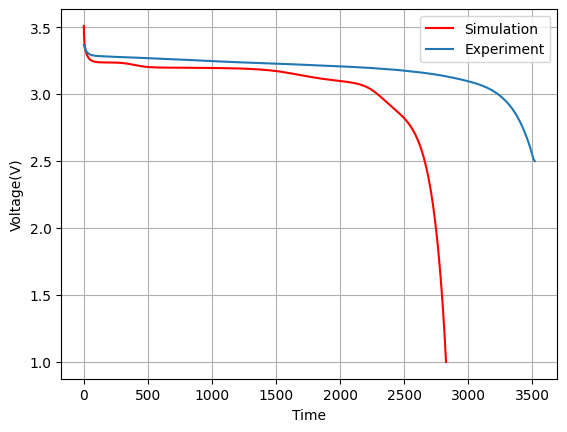

In [ ]:
plt.plot(sol["Time [s]"].data, sol["Terminal voltage [V]"].data,'red') # default pybamm Prada set OCVs value
plt.plot(df_dis_2['Timeseries'], df_dis_2['Voltage']) # Experimental graph
plt.legend(['Simulation','Experiment'])
plt.xlabel('Time')
plt.ylabel('Voltage(V)')
plt.grid()

In [ ]:
for i in LFP_HOCVs:
  ocp_data=i
  np.array(ocp_data)
  params.update({"Positive electrode OCP [V]":("half_cell_positive",ocp_data)})
  sim = pybamm.Simulation(model, parameter_values=params,experiment=experiment,solver=pybamm.IDAKLUSolver(rtol=0.0001, atol=1e-06, root_method='casadi', root_tol=1e-06, extrap_tol=None, output_variables=None, options=None))
  sol=sim.solve()
  sims.append(sim)



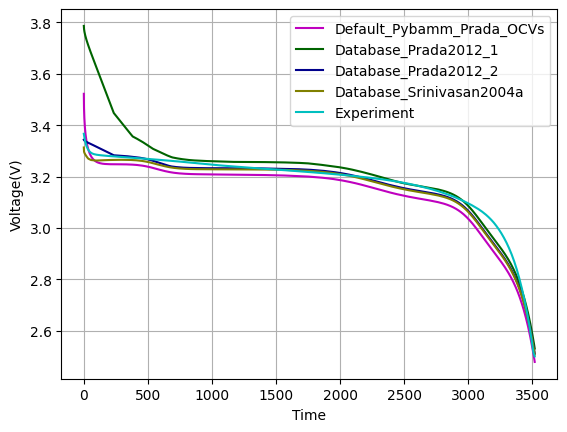

In [ ]:
plt.plot(sims[0].solution["Time [s]"].data, sims[0].solution["Terminal voltage [V]"].data,'m',label='Default_Pybamm_Prada_OCVs') # Prada OCVs from pybamm
plt.plot(sims[1].solution["Time [s]"].data, sims[1].solution["Terminal voltage [V]"].data,'darkgreen',label='Database_Prada2012_1') # Prada_1 First Positive HOCV from liion db database with Prada2012 tag
plt.plot(sims[2].solution["Time [s]"].data, sims[2].solution["Terminal voltage [V]"].data,'darkblue',label='Database_Prada2012_2') # Prada_2 second Positive HOCV from liion db database with same Prada2012 tag
plt.plot(sims[3].solution["Time [s]"].data, sims[3].solution["Terminal voltage [V]"].data,'olive',label='Database_Srinivasan2004a') # Srinivasan Positive HOCV from liion db database
plt.plot(df_dis_2['Timeseries'],df_dis_2['Voltage'],color='c',label='Experiment')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Voltage(V)')
plt.grid()

In [ ]:
# Positive Cathode half cell OCVs from liiondb
def half_cell_ocv_LFP_Kashkooli(x):
    import numpy as np
    # FITTING:
    # Equations taken directly from paper table 3
    import numpy as np
    U = 3.382 + 0.00470*x + 1.627*np.exp(-81.163*x**1.0138) + 7.6445E-8*np.exp(25.36*x**2.469) - 8.4410E-8*np.exp(25.262*x**2.478)
    return U

def half_cell_ocvDelacourt2011(x):
    import numpy as np
    # FITTING:
    # Equations taken directly from paper equation 9
    import numpy as np
    x = 1-x
    A0 = 3.4323
    A1 = -0.8428
    B1 = -80.2493
    C1 = 1.3198
    A2 = -3.2474E-6
    B2 = 20.2645
    C2 = 3.8003
    A3 = 3.2482E-6
    B3 = 20.2646
    C3 = 3.7995

    U = A0 + A1*np.exp(B1*x**C1) + A2*np.exp(B2*x**C2) + A3*np.exp(B3*x**C3)
    return U

def halfcellocvThorat2011(x):
    import numpy as np
    # FITTING:
    # Equations taken directly from paper

    U1 = 2.567462 + 57.69*(1-np.tanh(100*x + 2.9163927))
    U2 = 0.442953*np.arctan(-65.41928*x + 64.89741)
    U3 = 0.097237*np.arctan(-160.9058*x + 154.590)

    U = U1 + U2 + U3

    return U

def halfcellocvFarkhondeh2014function(x):
    import numpy as np
    # FITTING:
    # Equations taken directly from paper table 1
    import numpy as np

    A0 = 3.4227
    B0 = -2.0269E-2
    A1 = 0.5087
    B1 = -81.163
    C1 = 1.0138
    A2 = 7.6445E-8
    B2 = 25.361
    C2 = 3.2983
    A3 = -8.4410E-8
    B3 = 25.262
    C3 = 3.3111

    U = A0 + B0*x + A1*np.exp(B1*x**C1) + A2*np.exp(B2*x**C2) + A3*np.exp(B3*x**C3)
#     dUdx = B0 + A1*B1*C1*x**(C1-1)*np.exp(B1*x**C1) + A2*B2*C2*x**(C2-1)*np.exp(B2*x**C2) + A3*B3*C3*x**(C3-1)*np.exp(B3*x**C3)

#     F = 96485.33212 #C/mol
#     R = 8.31446261815324 #J/molK
#     T = 298.15 #K
#     gamma = -(F/(R*T))*x*(1-x)*dUdx

#     D_LFP = 5E-19 #m2s
#     D = gamma*D_LFP

    return U

def halfcellocvSrinivasan2004afunction(x):
    import numpy as np
    # FITTING:
    # Equations taken directly from  manuscript
    U = 3.114559 + 4.438792*np.arctan(-71.7352*x+70.85337) - 4.240252*np.arctan(-68.5605*x+67.730082)

    return U


In [ ]:
Function_HOCVs_set=[half_cell_ocv_LFP_Kashkooli,half_cell_ocvDelacourt2011, halfcellocvThorat2011,halfcellocvFarkhondeh2014function,halfcellocvSrinivasan2004afunction]

In [ ]:
# Function_HOCVs_set divided into two sets for cross simulation with Graphite HOCVs from database
p1=[halfcellocvThorat2011,halfcellocvSrinivasan2004afunction] # First set
p2=[half_cell_ocv_LFP_Kashkooli,halfcellocvFarkhondeh2014function] # Second set

In [ ]:
for i in Function_HOCVs_set:
    params.update({"Positive electrode OCP [V]":i})
    sim = pybamm.Simulation(model, parameter_values=params,experiment=experiment,solver=pybamm.IDAKLUSolver(rtol=0.0001, atol=1e-06, root_method='casadi', root_tol=1e-06, extrap_tol=None, output_variables=None, options=None))
    sol=sim.solve()
    sims1.append(sim)

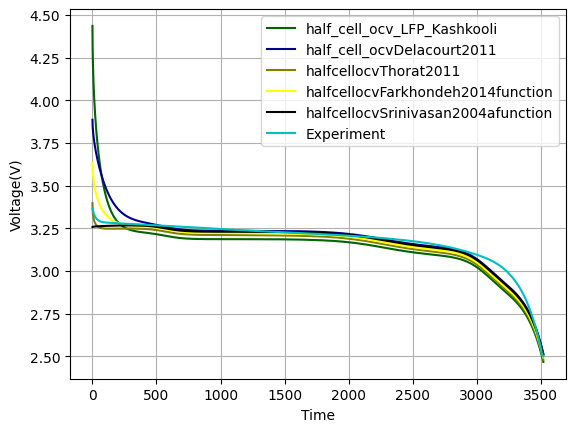

In [ ]:
plt.plot(sims1[1].solution["Time [s]"].data, sims1[1].solution["Terminal voltage [V]"].data,'darkgreen',label='half_cell_ocv_LFP_Kashkooli')
plt.plot(sims1[2].solution["Time [s]"].data, sims1[2].solution["Terminal voltage [V]"].data,'darkblue',label='half_cell_ocvDelacourt2011')
plt.plot(sims1[3].solution["Time [s]"].data, sims1[3].solution["Terminal voltage [V]"].data,'olive',label='halfcellocvThorat2011')
plt.plot(sims1[4].solution["Time [s]"].data, sims1[4].solution["Terminal voltage [V]"].data,'yellow',label='halfcellocvFarkhondeh2014function')
plt.plot(sims1[5].solution["Time [s]"].data, sims1[5].solution["Terminal voltage [V]"].data,'black',label='halfcellocvSrinivasan2004afunction')
plt.plot(df_dis_2['Timeseries'],df_dis_2['Voltage'],color='c',label='Experiment')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Voltage(V)')
plt.grid()

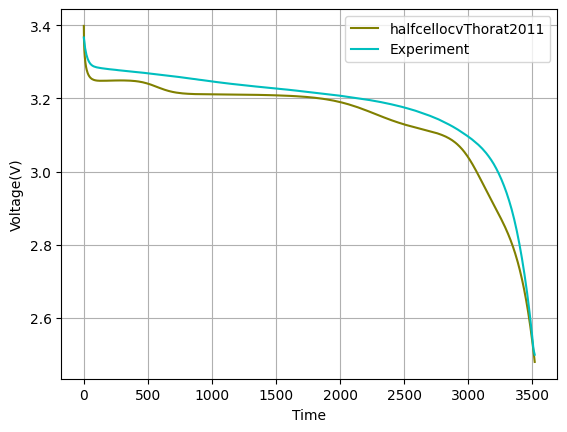

In [ ]:
plt.plot(sims1[3].solution["Time [s]"].data, sims1[3].solution["Terminal voltage [V]"].data,'olive')
plt.plot(df_dis_2['Timeseries'],df_dis_2['Voltage'],color='c')
plt.legend(['halfcellocvThorat2011','Experiment'])
plt.xlabel('Time')
plt.ylabel('Voltage(V)')
plt.grid()

Among the all positive OCVs from liiondb simulated with default pybamm Prada Negative OCV, Positive OCVs by **Thorat2011** shows the closet fit with experimental data keeping [Electrode width: **0.0875**, Height: **0.65**, Number of electrodes in parallel: **4**]

# Simulation of Positive OCV from liiondb with Negative OCV from liiondb as well

In [ ]:
for j in Graphite_HOCVs_filtered:
  nocp_data=j
  np.array(nocp_data)
  params.update({"Negative electrode OCP [V]":("half_cell_Negative",nocp_data)})
  for i in p1:
    params.update({"Positive electrode OCP [V]":i})
    sim = pybamm.Simulation(model, parameter_values=params,experiment=experiment,solver=pybamm.IDAKLUSolver(rtol=0.0001, atol=1e-06, root_method='casadi', root_tol=1e-06, extrap_tol=None, output_variables=None, options=None))
    sol=sim.solve()
    simulation_Graphite_array.append(sim)


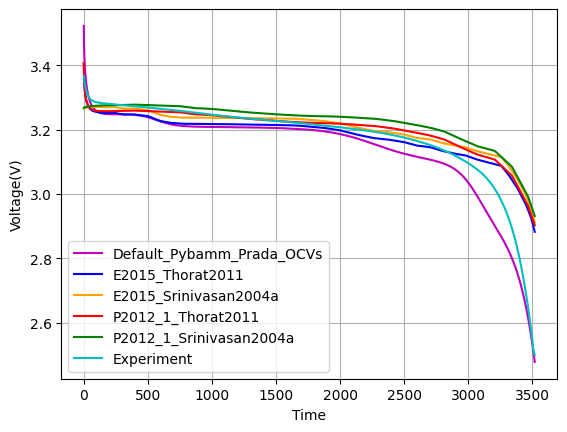

In [ ]:
plt.plot(simulation_Graphite_array[0].solution["Time [s]"].data, simulation_Graphite_array[0].solution["Terminal voltage [V]"].data,'m',label='Default_Pybamm_Prada_OCVs')
plt.plot(simulation_Graphite_array[1].solution["Time [s]"].data, simulation_Graphite_array[1].solution["Terminal voltage [V]"].data,'blue',label='E2015_Thorat2011')
plt.plot(simulation_Graphite_array[2].solution["Time [s]"].data, simulation_Graphite_array[2].solution["Terminal voltage [V]"].data,'orange',label='E2015_Srinivasan2004a')
plt.plot(simulation_Graphite_array[3].solution["Time [s]"].data, simulation_Graphite_array[3].solution["Terminal voltage [V]"].data,'r',label='P2012_1_Thorat2011')
plt.plot(simulation_Graphite_array[4].solution["Time [s]"].data, simulation_Graphite_array[4].solution["Terminal voltage [V]"].data,'g',label='P2012_1_Srinivasan2004a')
plt.plot(df_dis_2['Timeseries'],df_dis_2['Voltage'],color='c',label='Experiment')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Voltage(V)')
plt.grid()

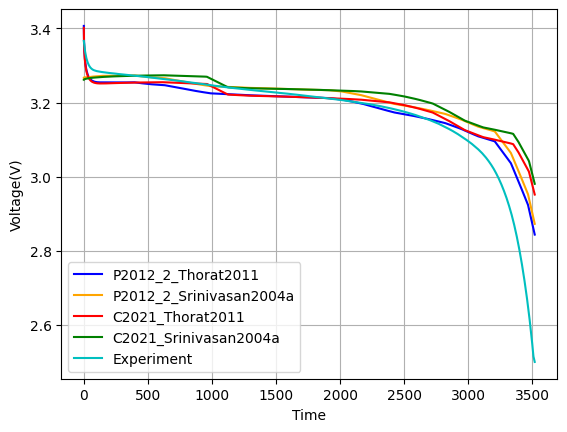

In [ ]:
plt.plot(simulation_Graphite_array[5].solution["Time [s]"].data, simulation_Graphite_array[5].solution["Terminal voltage [V]"].data,'blue',label='P2012_2_Thorat2011')
plt.plot(simulation_Graphite_array[6].solution["Time [s]"].data, simulation_Graphite_array[6].solution["Terminal voltage [V]"].data,'orange',label='P2012_2_Srinivasan2004a')
plt.plot(simulation_Graphite_array[7].solution["Time [s]"].data, simulation_Graphite_array[7].solution["Terminal voltage [V]"].data,'r',label='C2021_Thorat2011')
plt.plot(simulation_Graphite_array[8].solution["Time [s]"].data, simulation_Graphite_array[8].solution["Terminal voltage [V]"].data,'g',label='C2021_Srinivasan2004a')
plt.plot(df_dis_2['Timeseries'],df_dis_2['Voltage'],color='c',label='Experiment')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Voltage(V)')
plt.grid()

Selection of OCVs from given list:

Negative OCV: **Ecker2015(E2015), Prada2012(P2012)**
Positive OCV: **Thorat2011**

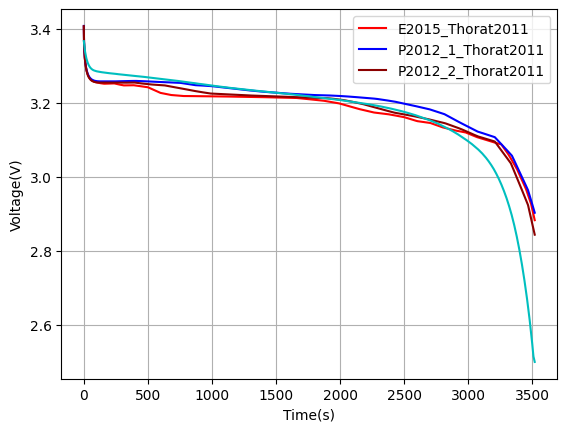

In [ ]:
plt.plot(simulation_Graphite_array[1].solution["Time [s]"].data, simulation_Graphite_array[1].solution["Terminal voltage [V]"].data,'r',label='E2015_Thorat2011')
plt.plot(simulation_Graphite_array[3].solution["Time [s]"].data, simulation_Graphite_array[3].solution["Terminal voltage [V]"].data,'blue',label='P2012_1_Thorat2011')
plt.plot(simulation_Graphite_array[5].solution["Time [s]"].data, simulation_Graphite_array[5].solution["Terminal voltage [V]"].data,'darkred',label='P2012_2_Thorat2011')
plt.plot(df_dis_2['Timeseries'],df_dis_2['Voltage'],color='c')
plt.legend()
plt.xlabel('Time(s)')
plt.ylabel('Voltage(V)')
plt.grid()

In [ ]:
for j in Graphite_HOCVs_filtered:
  nocp_data=j
  np.array(nocp_data)
  params.update({"Negative electrode OCP [V]":("half_cell_Negative",nocp_data)})
  for i in p2:
    params.update({"Positive electrode OCP [V]":i})
    sim = pybamm.Simulation(model, parameter_values=params,experiment=experiment,solver=pybamm.IDAKLUSolver(rtol=0.0001, atol=1e-06, root_method='casadi', root_tol=1e-06, extrap_tol=None, output_variables=None, options=None))
    sol=sim.solve()
    simulation_Graphite_array.append(sim)

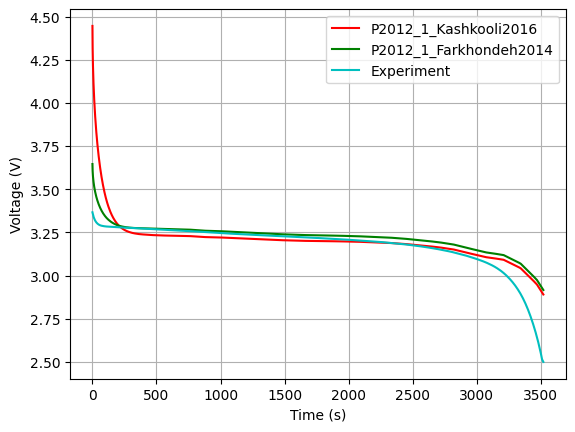

In [ ]:
plt.plot(simulation_Graphite_array[9].solution["Time [s]"].data, simulation_Graphite_array[9].solution["Terminal voltage [V]"].data,'olive',label='E2015_Kashkooli2016')
plt.plot(simulation_Graphite_array[10].solution["Time [s]"].data, simulation_Graphite_array[10].solution["Terminal voltage [V]"].data,'orange',label='E2015_Farkhondeh2014')
plt.plot(simulation_Graphite_array[11].solution["Time [s]"].data, simulation_Graphite_array[11].solution["Terminal voltage [V]"].data,'r',label='P2012_1_Kashkooli2016')
plt.plot(simulation_Graphite_array[12].solution["Time [s]"].data, simulation_Graphite_array[12].solution["Terminal voltage [V]"].data,'g',label='P2012_1_Farkhondeh2014')
plt.plot(df_dis_2['Timeseries'],df_dis_2['Voltage'],color='c',label='Experiment')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid()

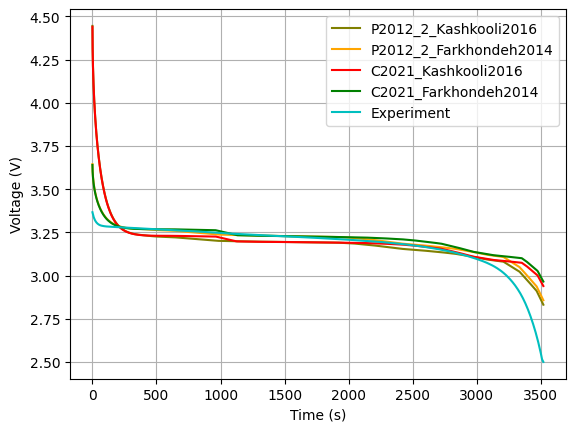

In [ ]:
plt.plot(simulation_Graphite_array[13].solution["Time [s]"].data, simulation_Graphite_array[13].solution["Terminal voltage [V]"].data,'olive',label='P2012_2_Kashkooli2016')
plt.plot(simulation_Graphite_array[14].solution["Time [s]"].data, simulation_Graphite_array[14].solution["Terminal voltage [V]"].data,'orange',label='P2012_2_Farkhondeh2014')
plt.plot(simulation_Graphite_array[15].solution["Time [s]"].data, simulation_Graphite_array[15].solution["Terminal voltage [V]"].data,'r',label='C2021_Kashkooli2016')
plt.plot(simulation_Graphite_array[16].solution["Time [s]"].data, simulation_Graphite_array[16].solution["Terminal voltage [V]"].data,'g',label='C2021_Farkhondeh2014')
plt.plot(df_dis_2['Timeseries'],df_dis_2['Voltage'],color='c',label='Experiment')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid()